<b>DADOS  :</b> Desbalanceados

<b>CODIFICACAO:</b> Label Encoding

<b>ALGORITMO:</b> Arvore de Decisao

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt

/Users/viniciuslucena/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("../../Database/3.Dados_Transformados/dados_LabelEncoding.csv")

In [4]:
X = df.values[:,:6] # Atributos
Y = df.values[:,6]  # Rotulo

In [5]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=test_size, random_state = 100)

In [6]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [7]:
y_pred = classifier.predict(X_test)

In [10]:
print("Acurácia : ", metrics.accuracy_score(y_test, y_pred))
print("Recall   : ", metrics.recall_score(y_test, y_pred))
#print("Precision: ", metrics.precision_score(y_test, y_pred))
#print("F1 Score : ", metrics.f1_score(y_test, y_pred))

Acurácia :  0.961246504195
Recall   :  0.0
Precision:  0.0


/Users/viniciuslucena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


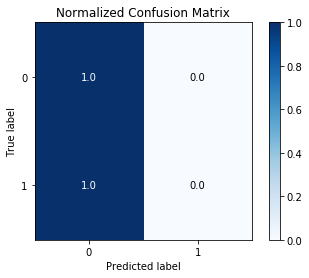

In [9]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
#plt.savefig("../5. Interpretacao/Matriz_Confusao_Dados_Desbalanceados.png", dpi=1000, transparent=True)

## Salvando o modelo

In [11]:
import pickle
filename = "Modelos/M1_Desbalanceados_LabelEncoding_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---